In [1]:
import sqc
import numpy as np
from exercises import CRz,qft,cqft
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
def period(x,L):
    if x > L/2:
        return x - L
    return x

def w(j,N):
    assert(j<N and j>=0)
    if j == N-1:
        return -2**j
    return 2**j

def CexpIaX(c,a,xbits,op):
    N=len(xbits)
    for j in range(len(xbits)):
        op=CRz(c,xbits[j],a*w(j,N),op)
    return op

def CexpIaP(c,a,xbits,op):
    N=len(xbits)
    op=qft(op,mask=xbits,inverse=False)
    op=CexpIaX(c,a*2.*np.pi / 2**N,xbits,op)
    op=qft(op,mask=xbits,inverse=True)
    return op

nxbits=5
nabits=1
nbits=nxbits+nabits
s0=sqc.state(nbits,basis=["|%d>|%d>" % (x//2**nxbits,period(x%2**nxbits,2**nxbits))
                          for x in range(2**nbits)])
s1=sqc.operator(nbits).X(1).X(2).X(nxbits)*s0
print(s1)
s2=CexpIaP(nxbits,11,range(nxbits),sqc.operator(nbits))*s1
print(s2)

   1 * |1>|6>
   1 * |1>|-15>


In [3]:
def CexpIaX2(c,a,xbits,op):
    N=len(xbits)
    l=a/12.*(2.+4.**N)-a/2.
    op=CRz(c,xbits[0],l,CRz(c,xbits[0],l,op.X(xbits[0])).X(xbits[0]))
    for j in range(len(xbits)):
        op=CRz(c,xbits[j],-a*w(j,N),op)
        for i in range(len(xbits)):
            if i != j:
                t=a/4.*w(j,N)*w(i,N)
                ga=xbits[i]
                gb=xbits[j]
                op=op.CNOT(gb,ga)
                op=op.X(ga)
                op=CRz(c,ga,t,op)
                op=op.X(ga)
                op=CRz(c,ga,-t,op)
                op=op.CNOT(gb,ga)
    return op

def CexpIaP2(c,a,xbits,op):
    N=len(xbits)
    op=qft(op,mask=xbits,inverse=False)
    op=CexpIaX2(c,a*(2.*np.pi / 2**N)**2.,xbits,op)
    op=qft(op,mask=xbits,inverse=True)
    return op

In [4]:
s3=CexpIaX2(nxbits,1,range(nxbits),sqc.operator(nbits))*s1
print(np.log(s3[6+2**nxbits])/1j+12.*np.pi)

(36-7.389922007661198e-16j)


In [5]:
def timeEvolutionPlot(dt,steps,s1):
    Tdt=CexpIaP2(nxbits,dt,range(nxbits),sqc.operator(nbits))
    print(len(Tdt.m))
    sn=s1
    for tstep in range(steps):
        res=sqc.sample(sn, n=100, mask=range(nxbits))
        sn=Tdt*sn
    
        xvals=[ period(x,2**nxbits) for x in res.keys() ]
        yvals=res.values()

        plt.xlabel('x')
        plt.xlim(-2**nxbits/2,2**nxbits/2)
        plt.ylabel('count')
        plt.title('t=%g' % (tstep*dt))
        plt.bar(xvals,yvals,width=0.75)
        plt.show()

   1 * |1>|6>
439


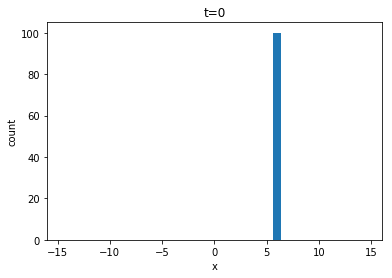

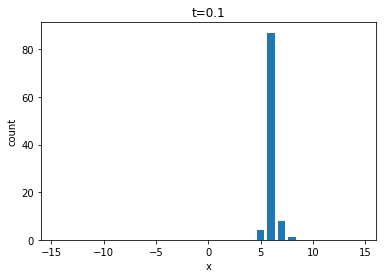

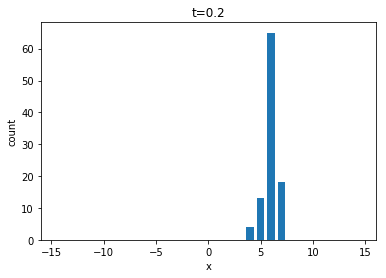

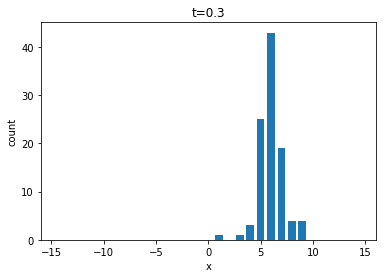

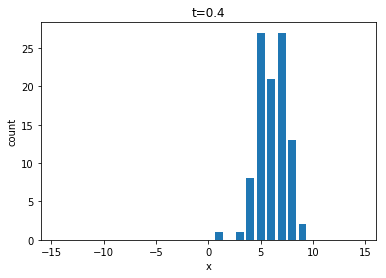

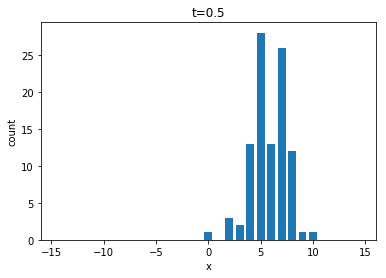

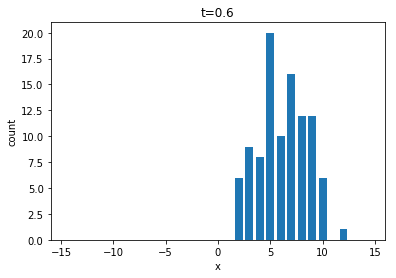

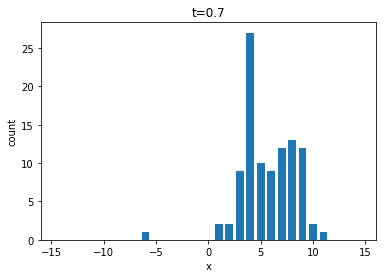

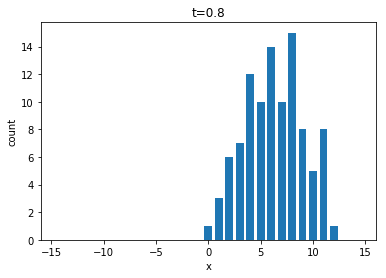

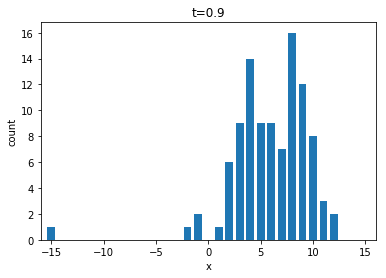

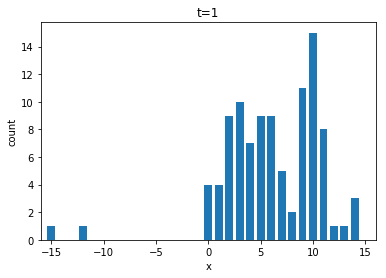

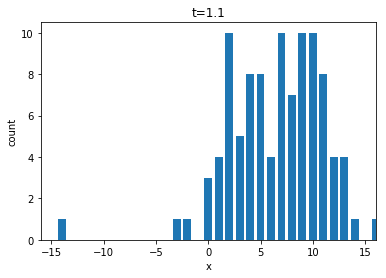

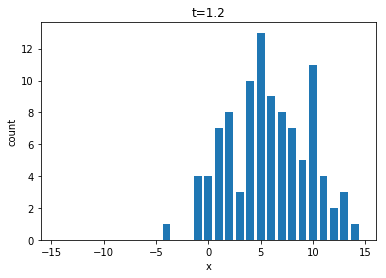

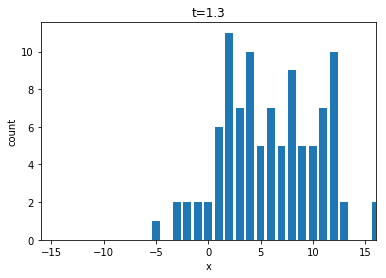

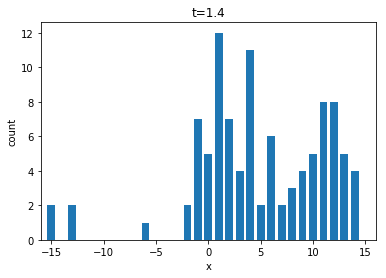

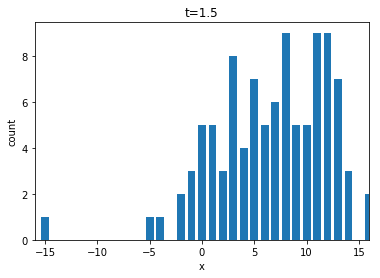

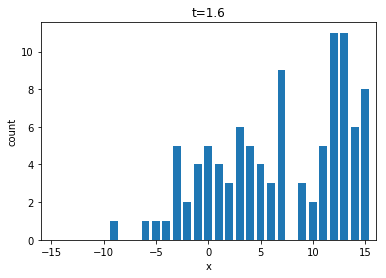

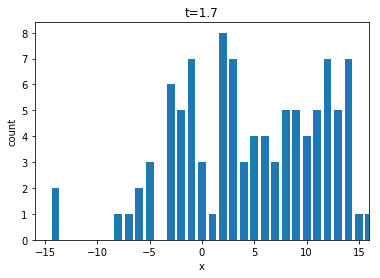

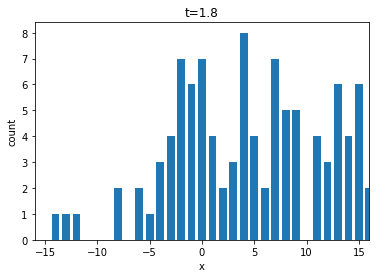

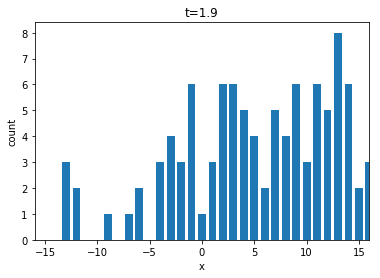

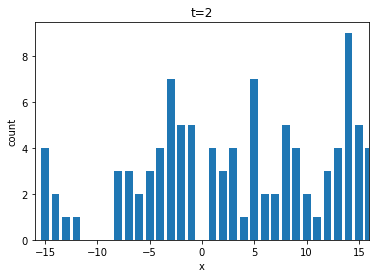

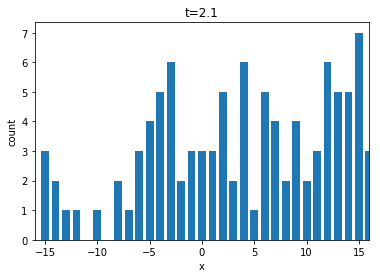

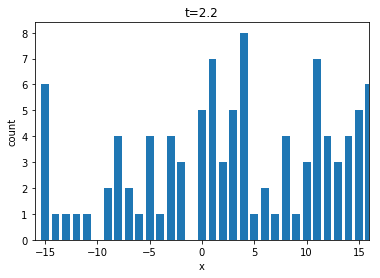

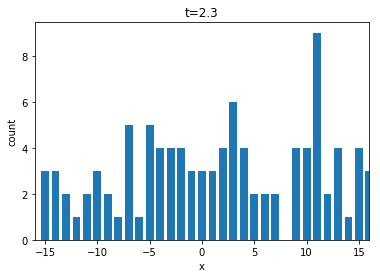

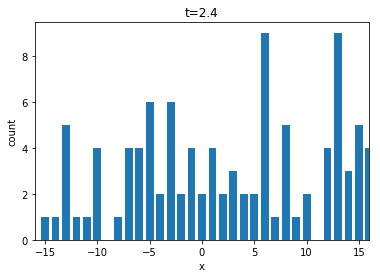

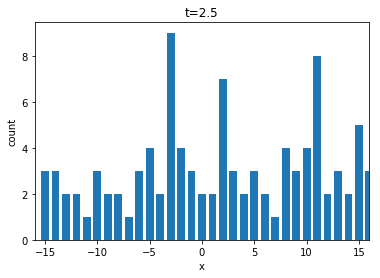

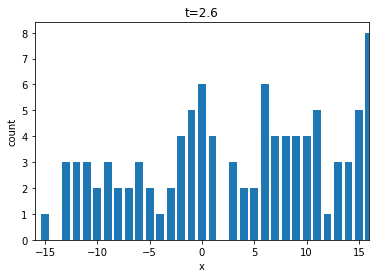

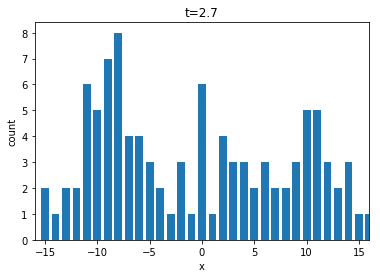

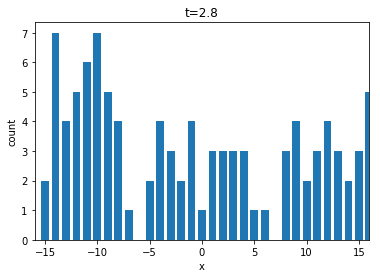

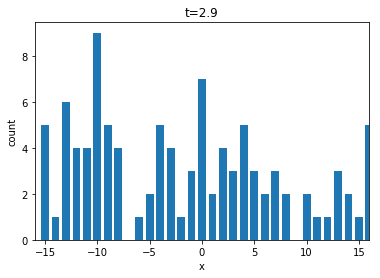

In [6]:
print(s1)
timeEvolutionPlot(0.1,30,s1)

439


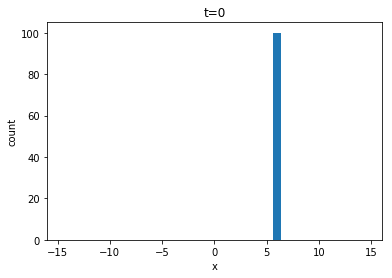

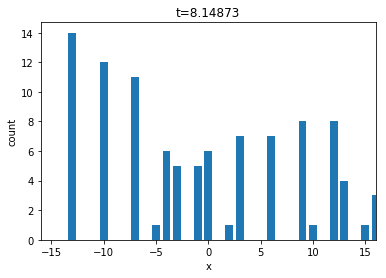

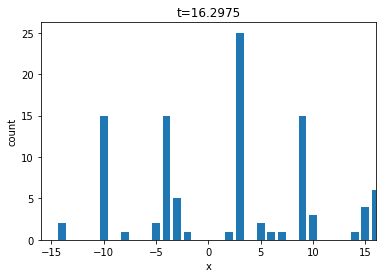

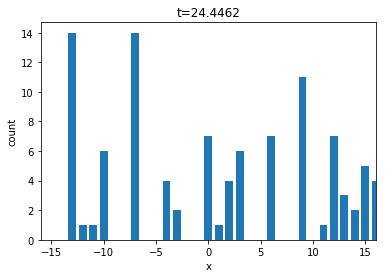

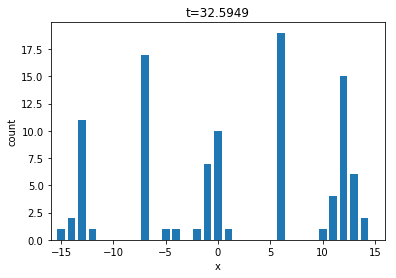

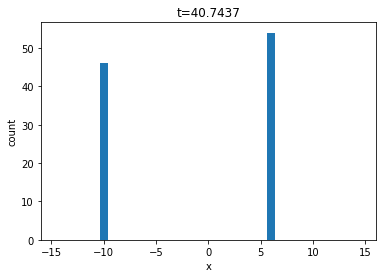

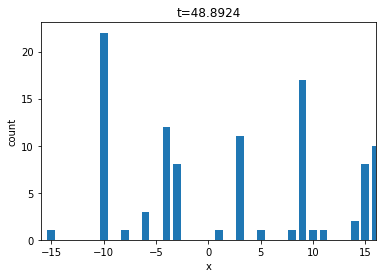

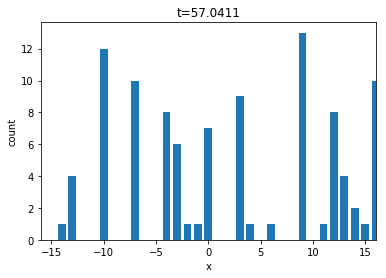

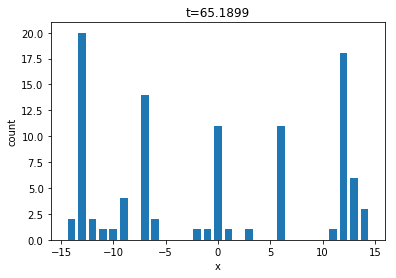

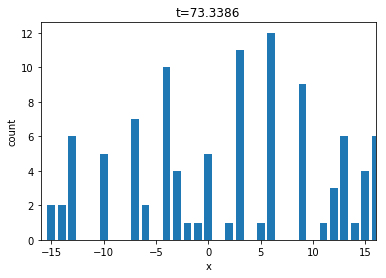

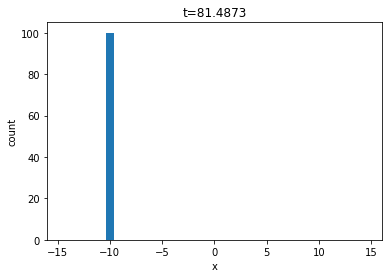

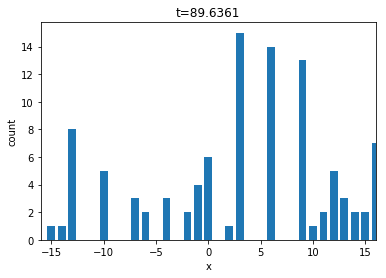

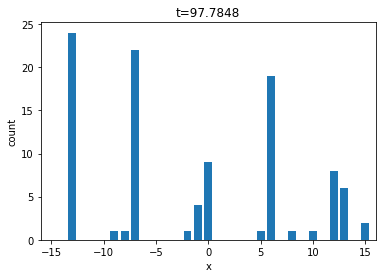

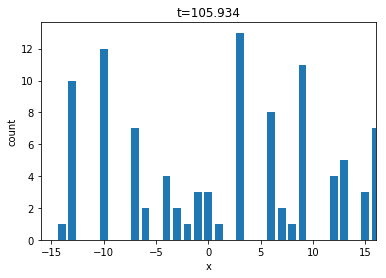

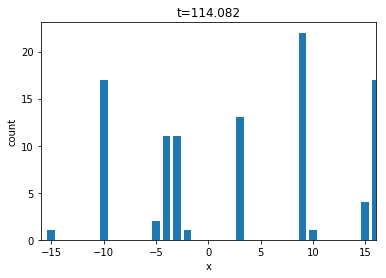

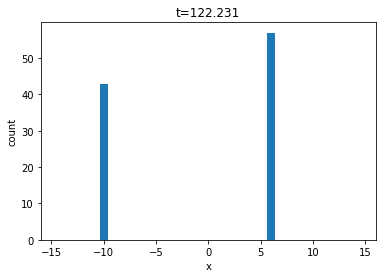

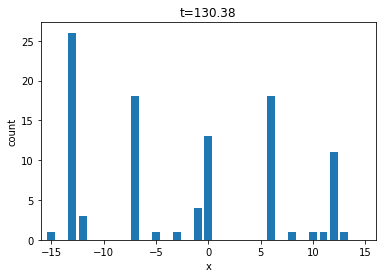

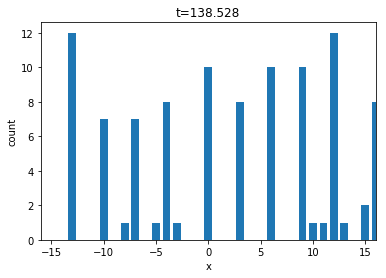

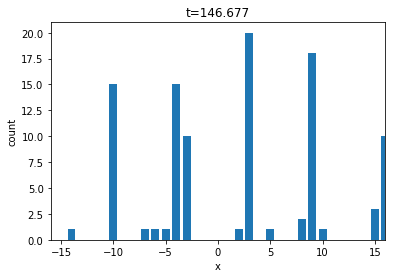

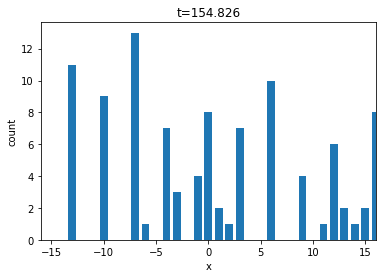

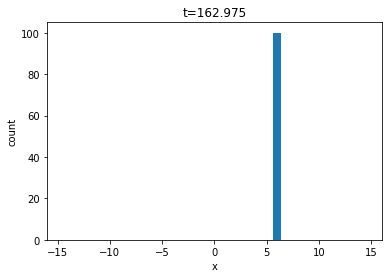

In [7]:
# Time-periodicity: all eigenvalues are multiple of (2pi/L)**2 -> once smallest eval has 2pi-periodicity,
# entire system has 2pi-periodicity -> temporal loop
Tcrit=2*np.pi / (2*np.pi/32)**2.
timeEvolutionPlot(Tcrit/20,21,s1)

   1 * |1>|0>
1156


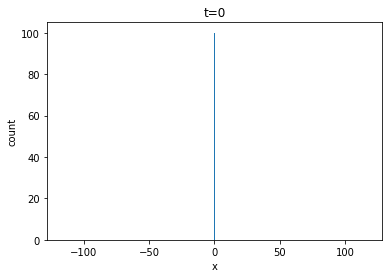

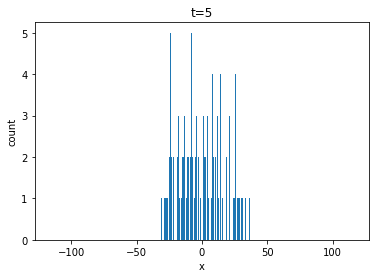

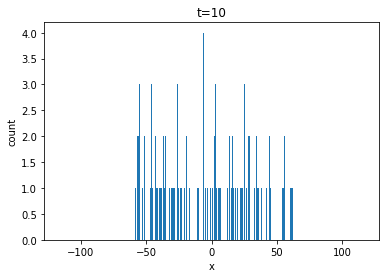

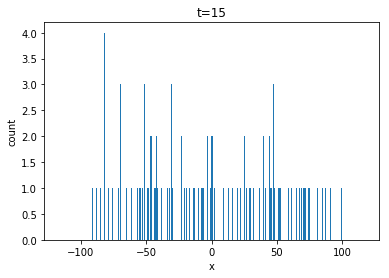

In [8]:
# Now discuss circuit to create smeared packet
#def Rot(i,t,op):
#    return op.Rz(i,-np.pi/2).H(i).Rz(i,-2*t).H(i).Rz(i,t).X(i).Rz(i,t).X(i).Rz(i,np.pi/2)
    
#s1=CexpIaP(nxbits,0.5,range(nxbits),sqc.operator(nbits).X(0).X(nxbits))*s0

nxbits=8
nabits=1
nbits=nxbits+nabits
s0=sqc.state(nbits,basis=["|%d>|%d>" % (x//2**nxbits,period(x%2**nxbits,2**nxbits))
                          for x in range(2**nbits)])

def createSource(xbits,p,op):
    n=len(xbits)
    for i in range(n):
        op=op.H(xbits[i]).Rz(xbits[i],-p*2**i)
    return op

s1=createSource(range(0),2*np.pi/2**nxbits*64,sqc.operator(nbits).X(nxbits))*s0
print(s1)

timeEvolutionPlot(5,4,s1)
#s2=expIaP2(0.3,range(nxbits),sqc.operator(nxbits))*s1
#s3=qft(sqc.operator(nxbits),mask=range(nxbits),inverse=False)*s2
#timeEvolutionPlot(0.1,30,s3)

   0.25    * |1>|0>
 + -0.25j  * |1>|1>
 + (-0.25) * |1>|2>
 + 0.25j   * |1>|3>
 + 0.25    * |1>|4>
 + -0.25j  * |1>|5>
 + (-0.25) * |1>|6>
 + 0.25j   * |1>|7>
 + 0.25    * |1>|8>
 + -0.25j  * |1>|9>
 + (-0.25) * |1>|10>
 + 0.25j   * |1>|11>
 + 0.25    * |1>|12>
 + -0.25j  * |1>|13>
 + (-0.25) * |1>|14>
 + 0.25j   * |1>|15>
1156


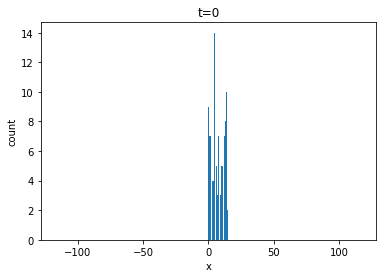

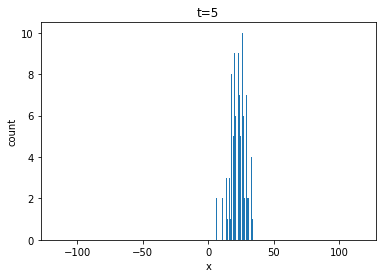

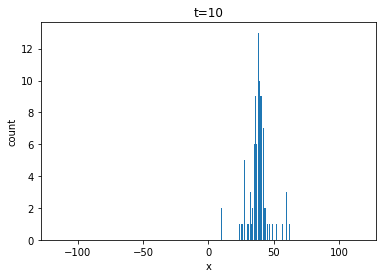

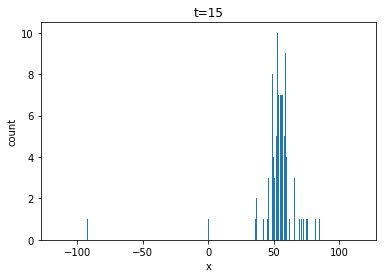

In [9]:
s1=createSource(range(4),2*np.pi/2**nxbits*64,sqc.operator(nbits).X(nxbits))*s0
print(s1)

timeEvolutionPlot(5,4,s1)